In [107]:
import pandas as pd
import numpy as np
from numpy import random
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.dummy import DummyClassifier
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from seaborn import heatmap
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.metrics import confusion_matrix
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV

In [2]:
dados = pd.read_csv('https://raw.githubusercontent.com/alura-cursos/reducao-dimensionalidade/master/data-set/exames.csv')

In [3]:
dados.head(10)

,id,diagnostico,exame_1,exame_2,exame_3,exame_4,exame_5,exame_6,exame_7,exame_8,...,exame_24,exame_25,exame_26,exame_27,exame_28,exame_29,exame_30,exame_31,exame_32,exame_33
0,842302,M,17.99,10.38,122.80,103.78,1001.0,0.11840,0.27760,0.30010,...,184.60,2019.0,0.1622,0.6656,0.7119,0.786,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,103.78,1326.0,0.08474,0.07864,0.08690,...,158.80,1956.0,0.1238,0.1866,0.2416,0.786,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,103.78,1203.0,0.10960,0.15990,0.19740,...,152.50,1709.0,0.1444,0.4245,0.4504,0.786,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,103.78,386.1,0.14250,0.28390,0.24140,...,98.87,567.7,0.2098,0.8663,0.6869,0.786,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,103.78,1297.0,0.10030,0.13280,0.19800,...,152.20,1575.0,0.1374,0.2050,0.4000,0.786,0.1625,0.2364,0.07678,0.854454
5,843786,M,12.45,15.70,82.57,103.78,477.1,0.12780,0.17000,0.15780,...,103.40,741.6,0.1791,0.5249,0.5355,0.786,0.1741,0.3985,0.12440,0.804347
6,844359,M,18.25,19.98,119.60,103.78,1040.0,0.09463,0.10900,0.11270,...,153.20,1606.0,0.1442,0.2576,0.3784,0.786,0.1932,0.3063,0.08368,NaN
7,84458202,M,13.71,20.83,90.20,103.78,577.9,0.11890,0.16450,0.09366,...,110.60,897.0,0.1654,0.3682,0.2678,0.786,0.1556,0.3196,0.11510,NaN
8,844981,M,13.00,21.82,87.50,103.78,519.8,0.12730,0.19320,0.18590,...,106.20,739.3,0.1703,0.5401,0.5390,0.786,0.2060,0.4378,0.10720,NaN
9,84501001,M,12.46,24.04,83.97,103.78,475.9,0.11860,0.23960,0.22730,...,97.65,711.4,0.1853,1.0580,1.1050,0.786,0.2210,0.4366,0.20750,NaN


In [4]:
dados.shape

(569, 35)

In [6]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 35 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           569 non-null    int64  
 1   diagnostico  569 non-null    object 
 2   exame_1      569 non-null    float64
 3   exame_2      569 non-null    float64
 4   exame_3      569 non-null    float64
 5   exame_4      569 non-null    float64
 6   exame_5      569 non-null    float64
 7   exame_6      569 non-null    float64
 8   exame_7      569 non-null    float64
 9   exame_8      569 non-null    float64
 10  exame_9      569 non-null    float64
 11  exame_10     569 non-null    float64
 12  exame_11     569 non-null    float64
 13  exame_12     569 non-null    float64
 14  exame_13     569 non-null    float64
 15  exame_14     569 non-null    float64
 16  exame_15     569 non-null    float64
 17  exame_16     569 non-null    float64
 18  exame_17     569 non-null    float64
 19  exame_18

## Treinando modelo baseline

In [20]:
SEED = 123143
random.seed(SEED)

X = dados.drop(columns=['id','diagnostico','exame_33'])
y = dados.diagnostico

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [25]:
classificador = RandomForestClassifier(n_estimators=100)
classificador.fit(X_train,y_train)
print(f'Acurácia: {(classificador.score(X_test,y_test)*100).round(2)} %')

Acurácia: 92.4 %


## Treinando modelo Dummy

In [28]:
SEED = 123143
random.seed(SEED)

classificador_dummy = DummyClassifier(strategy='most_frequent')
classificador_dummy.fit(X_train,y_train)
print(f'Acurácia (Dummy): {(classificador_dummy.score(X_test,y_test)*100).round(2)} %')

Acurácia (Dummy): 66.67 %


## Visualização Gráfica 

In [47]:
padronizador = StandardScaler()
padronizador.fit(X)
valores_exames_padronizado = padronizador.transform(X)
valores_exames_padronizado = pd.DataFrame(valores_exames_padronizado, columns=X.keys())

In [48]:
dados_plot = pd.concat([y, valores_exames_padronizado.iloc[:,0:10]],axis=1)
dados_plot = pd.melt(dados_plot, id_vars='diagnostico', var_name='exames', value_name='valores')
dados_plot.head()

,diagnostico,exames,valores
0,M,exame_1,1.097064
1,M,exame_1,1.829821
2,M,exame_1,1.579888
3,M,exame_1,-0.768909
4,M,exame_1,1.750297


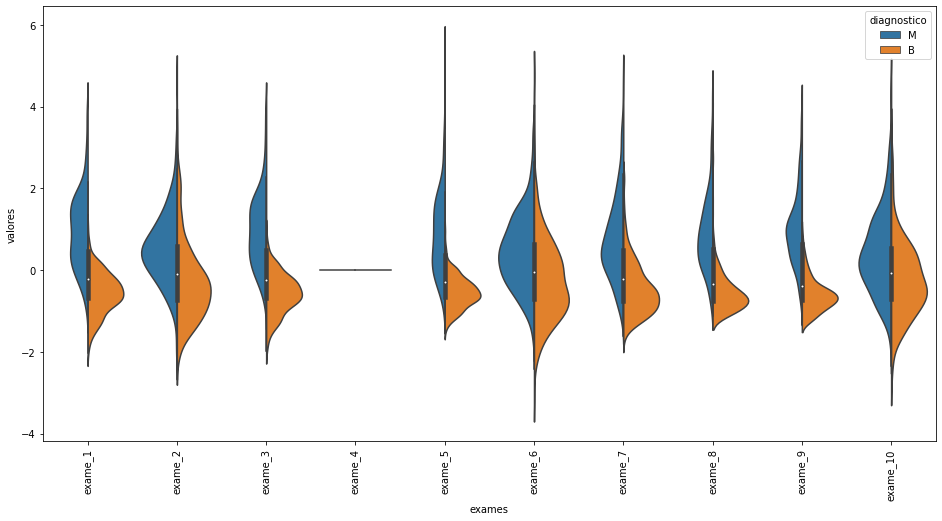

In [50]:
plt.figure(figsize=(16,8))
ax = sns.violinplot(x='exames', y='valores', hue='diagnostico', data=dados_plot, split=True)
plt.xticks(rotation = 90)
ax=ax

In [51]:
def grafico_violino(valores, inicio, fim):
    dados_plot = pd.concat([y, valores.iloc[:,inicio:fim]],axis=1)
    dados_plot = pd.melt(dados_plot, id_vars='diagnostico', var_name='exames', value_name='valores')
    plt.figure(figsize=(16,8))
    ax = sns.violinplot(x='exames', y='valores', hue='diagnostico', data=dados_plot, split=True)
    plt.xticks(rotation = 90)
    ax=ax

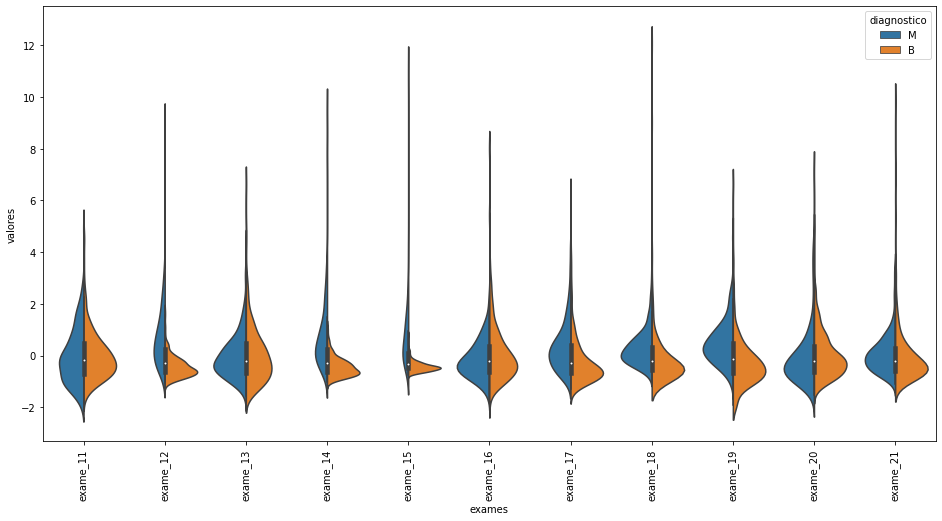

In [52]:
grafico_violino(valores_exames_padronizado, 10,21)

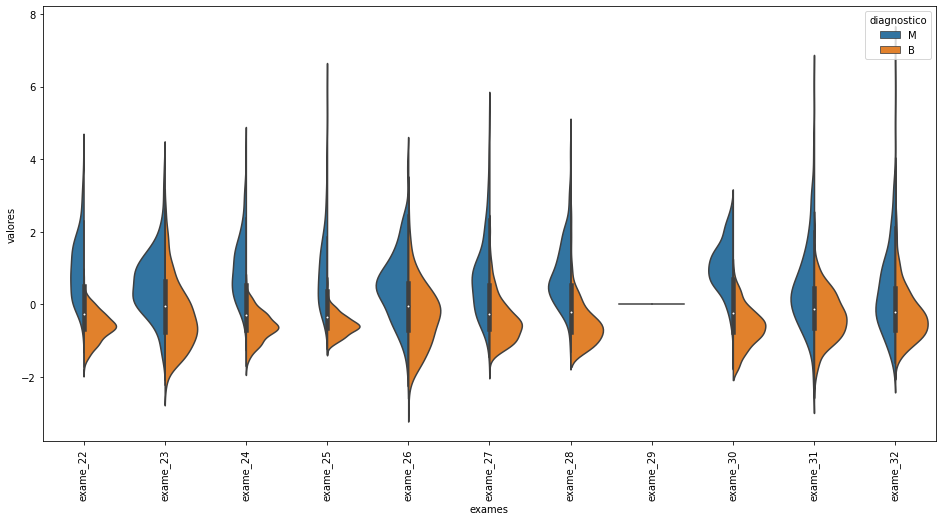

In [53]:
grafico_violino(valores_exames_padronizado,21, 32)

In [54]:
valores_exames = valores_exames_padronizado.drop(columns=['exame_4','exame_29'])

def classificar(valores):
    SEED = 1234
    random.seed(SEED)
    X_train, X_test, y_train, y_test = train_test_split(valores, y, test_size=0.3)
    classificador = RandomForestClassifier(n_estimators=100)
    classificador.fit(X_train,y_train)
    print(f'Acurácia: {(classificador.score(X_test,y_test)*100).round(2)} %')

In [55]:
classificar(valores_exames)

Acurácia: 92.98 %


In [58]:
matriz_correlacao = valores_exames.corr()

<AxesSubplot:>

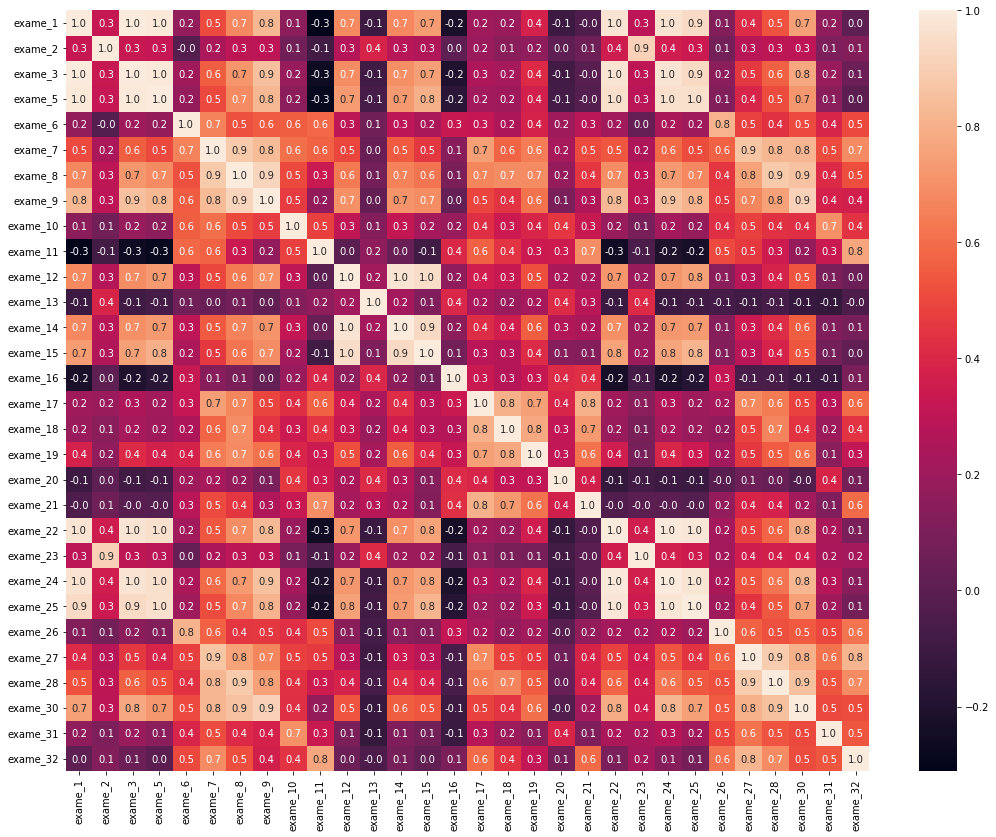

In [64]:
plt.figure(figsize=(18,14))
sns.heatmap(matriz_correlacao, annot=True, fmt='.1f')

In [65]:
matriz_correlacao_v1 = matriz_correlacao[matriz_correlacao>0.99]

In [68]:
matriz_correlacao_v2 = matriz_correlacao_v1.sum()
matriz_correlacao_v2

exame_1     1.997855
exame_2     1.000000
exame_3     1.997855
exame_5     1.000000
exame_6     1.000000
exame_7     1.000000
exame_8     1.000000
exame_9     1.000000
exame_10    1.000000
exame_11    1.000000
exame_12    1.000000
exame_13    1.000000
exame_14    1.000000
exame_15    1.000000
exame_16    1.000000
exame_17    1.000000
exame_18    1.000000
exame_19    1.000000
exame_20    1.000000
exame_21    1.000000
exame_22    1.993708
exame_23    1.000000
exame_24    1.993708
exame_25    1.000000
exame_26    1.000000
exame_27    1.000000
exame_28    1.000000
exame_30    1.000000
exame_31    1.000000
exame_32    1.000000
dtype: float64

In [71]:
variaveis_correlacionadas = matriz_correlacao_v2[matriz_correlacao_v2>1]

In [72]:
variaveis_correlacionadas

exame_1     1.997855
exame_3     1.997855
exame_22    1.993708
exame_24    1.993708
dtype: float64

In [73]:
valores_exames_v4 = valores_exames.drop(columns=variaveis_correlacionadas.keys())
valores_exames_v4

,exame_2,exame_5,exame_6,exame_7,exame_8,exame_9,exame_10,exame_11,exame_12,exame_13,...,exame_20,exame_21,exame_23,exame_25,exame_26,exame_27,exame_28,exame_30,exame_31,exame_32
0,-2.073335,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,2.489734,-0.565265,...,1.148757,0.907083,-1.359293,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,-0.353632,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,0.499255,-0.876244,...,-0.805450,-0.099444,-0.369203,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,0.456187,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,1.228676,-0.780083,...,0.237036,0.293559,-0.023974,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,0.253732,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,0.326373,-0.110409,...,4.732680,2.047511,0.133984,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,-1.151816,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,1.270543,-0.790244,...,-0.361092,0.499328,-1.466770,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,0.721473,2.343856,1.041842,0.219060,1.947285,2.320965,-0.312589,-0.931027,2.782080,0.071025,...,-1.138416,0.167980,0.117700,2.015301,0.378365,-0.273318,0.664512,1.629151,-1.360158,-0.709091
565,2.085134,1.723842,0.102458,-0.017833,0.693043,1.263669,-0.217664,-1.058611,1.300499,2.260938,...,-0.189161,-0.490556,2.047399,1.494959,-0.691230,-0.394820,0.236573,0.733827,-0.531855,-0.973978
566,2.045574,0.577953,-0.840484,-0.038680,0.046588,0.105777,-0.809117,-0.895587,0.184892,-0.257371,...,-0.891416,0.036727,1.374854,0.427906,-0.809587,0.350735,0.326767,0.414069,-1.104549,-0.318409
567,2.336457,1.735218,1.525767,3.272144,3.296944,2.658866,2.137194,1.043695,1.157935,0.686088,...,0.326634,0.904057,2.237926,1.653171,1.430427,3.904848,3.197605,2.289985,1.919083,2.219635


In [74]:
classificar(valores_exames_v4)

Acurácia: 91.81 %


In [75]:
valores_exames_v5 = valores_exames.drop(columns=['exame_3','exame_24'])
classificar(valores_exames_v5)

Acurácia: 92.98 %


In [79]:
k_melhores = SelectKBest(chi2, k=5)
k_melhores

SelectKBest(k=5, score_func=<function chi2 at 0x000002CE6567EAF0>)

In [82]:
valores_exames_v6 = X.drop(columns=['exame_4','exame_29','exame_3','exame_24'])

In [89]:
SEED = 1234
random.seed(SEED)

X_train, X_test, y_train, y_test = train_test_split(valores_exames_v6, y, test_size=0.3)
k_melhores.fit(X_train,y_train)
treino_kbest = k_melhores.transform(X_train)
teste_kbest = k_melhores.transform(X_test)

In [90]:
treino_kbest.shape

(398, 5)

In [91]:
teste_kbest.shape

(171, 5)

In [92]:
classificador_2 = RandomForestClassifier(n_estimators=100, random_state=1234)
classificador_2.fit(treino_kbest, y_train)
print(f'Acurácia: {(classificador_2.score(teste_kbest,y_test)*100).round(2)} %')

Acurácia: 92.4 %


In [94]:
matriz_confusao = confusion_matrix(y_test,classificador_2.predict(teste_kbest))
matriz_confusao

array([[100,   5],
       [  8,  58]], dtype=int64)

[Text(0.5, 74.5, 'Predição'), Text(110.5, 0.5, 'Real')]

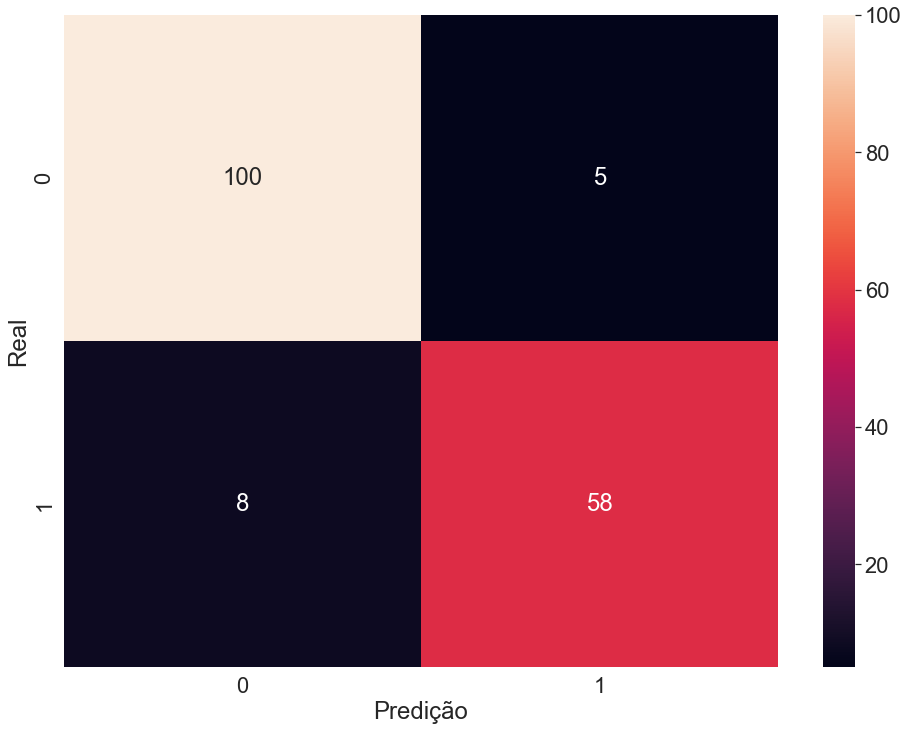

In [100]:
plt.figure(figsize=(16,12))
sns.set(font_scale=2)
sns.heatmap(matriz_confusao, annot=True, fmt='d').set(xlabel='Predição',ylabel='Real')

Acurácia: 90.06 %


[Text(0.5, 74.5, 'Predição'), Text(110.5, 0.5, 'Real')]

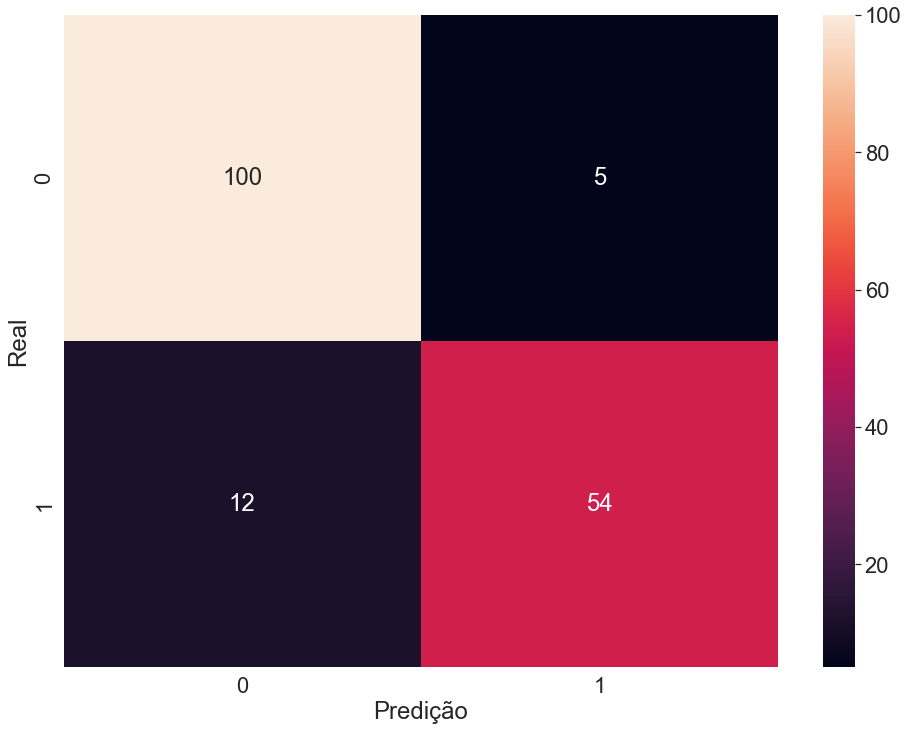

In [106]:
SEED = 1234
random.seed(SEED)

X_train, X_test, y_train, y_test = train_test_split(valores_exames_v6, y, test_size=0.3)

classificador = RandomForestClassifier(n_estimators=100, random_state=1234)
classificador.fit(X_train, y_train)
selecionar_rfe = RFE(estimator=classificador, n_features_to_select=5, step=1)
selecionar_rfe.fit(X_train, y_train)
treino_rfe = selecionar_rfe.transform(X_train)
teste_rfe = selecionar_rfe.transform(X_test)
classificador.fit(treino_rfe, y_train)
print(f'Acurácia: {(classificador.score(teste_rfe,y_test)*100).round(2)} %')
matriz_confusao = confusion_matrix(y_test,classificador.predict(teste_rfe))
plt.figure(figsize=(16,12))
sns.set(font_scale=2)
sns.heatmap(matriz_confusao, annot=True, fmt='d').set(xlabel='Predição',ylabel='Real')

Resultado da classificação 92.98%


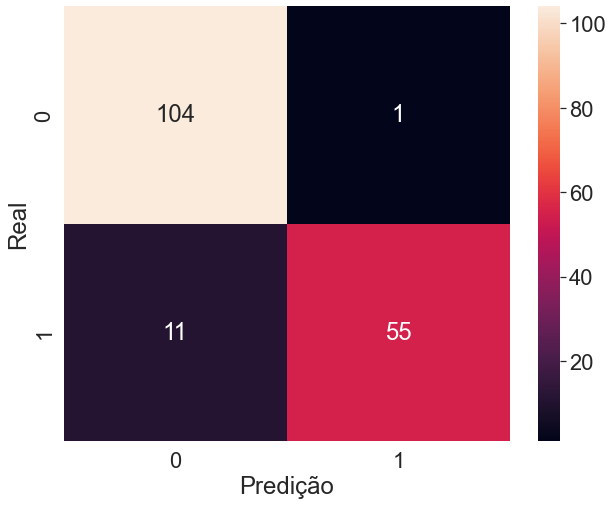

In [120]:
SEED = 1234
random.seed(SEED)

treino_x, teste_x, treino_y, teste_y = train_test_split(valores_exames_v6,
                                                       y,
                                                       test_size = 0.3)

classificador = RandomForestClassifier(n_estimators=100, random_state = 1234)
classificador.fit(treino_x, treino_y)


selecionador_rfecv = RFECV(estimator = classificador, cv = 2, scoring = "accuracy", step = 1)
selecionador_rfecv.fit(treino_x, treino_y)
treino_rfecv = selecionador_rfecv.transform(treino_x)
teste_rfecv = selecionador_rfecv.transform(teste_x)
classificador.fit(treino_rfecv, treino_y)

matriz_confusao = confusion_matrix(teste_y, classificador.predict(teste_rfecv))
plt.figure(figsize = (10, 8))
sns.set(font_scale = 2)
sns.heatmap(matriz_confusao, annot = True, fmt = "d").set(xlabel = "Predição", ylabel = "Real")

print("Resultado da classificação %.2f%%" % (classificador.score(teste_rfecv, teste_y)* 100))

C:\Users\PICHAU\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: The `grid_scores_` attribute is deprecated in version 1.0 in favor of `cv_results_` and will be removed in version 1.2.
  warnings.warn(msg, category=FutureWarning)


<function matplotlib.pyplot.show(close=None, block=None)>

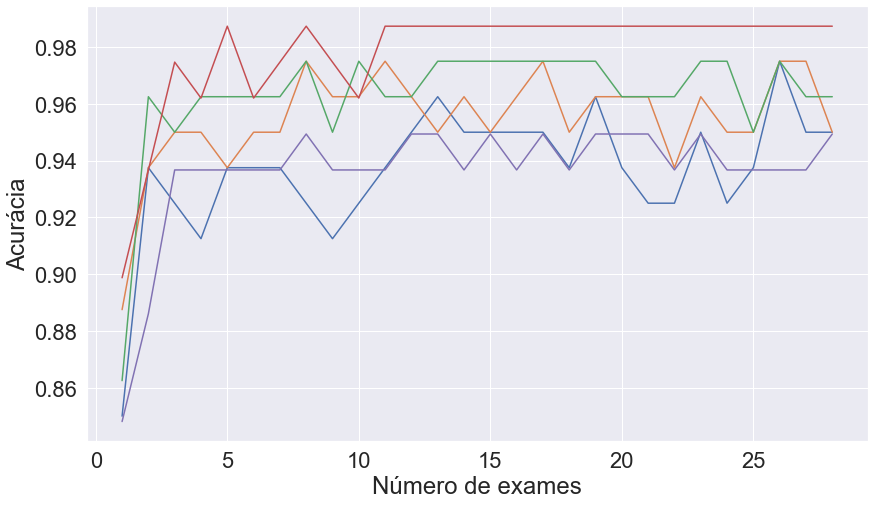

In [119]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 8))
plt.xlabel("Número de exames")
plt.ylabel("Acurácia")

plt.plot(range(1, len(selecionador_rfecv.grid_scores_) + 1), selecionador_rfecv.grid_scores_)
plt.show

(569, 18)